In [2]:
# Import necessary libraries
import nltk
nltk.download('punkt')
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import string

# Preprocess  text
def preprocess_text(text):
    # Tokenization
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]

    # Remove punctuation and convert words to lowercase
    words = [[word.lower() for word in sentence if word.isalpha()] for sentence in words]

    return words

# Preprocess the provided text

file_path = "text"
with open(file_path, "r") as file:
    text = file.read()

print(text)

preprocessed_text = preprocess_text(text)

# Train a Word2Vec model
model = Word2Vec(preprocessed_text, vector_size=100, window=5, min_count=1, sg=0)

# Example: Find similar words to "Morocco"
similar_words = model.wv.most_similar("morocco", topn=5)
print("Words similar to 'Morocco':")
for word, score in similar_words:
    print(f"{word}: {score}")

# Example: Find similar words to "Marrakech"
similar_words = model.wv.most_similar("marrakech", topn=5)
print("\nWords similar to 'Marrakech':")
for word, score in similar_words:
    print(f"{word}: {score}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Morocco and Marrakech: A Tapestry of Tradition and Modernity** Morocco, located at the crossroads of Europe and Africa, is a country drenched in history, mystery, and cultural richness. A testament to the ancient civilizations that once flourished here, this North African kingdom boasts a unique blend of Arab, Berber, and European influences. At the heart of Morocco's rich tapestry lies Marrakech, one of its four imperial cities and a vibrant epicenter of tradition and modernity. **Geographical Significance** Morocco is bordered by the Atlantic Ocean to the west, the Mediterranean Sea to the north, Algeria to the east and southeast, and the vast Sahara desert to the south. Its strategic location has historically made it a sought-after territory and a melting pot of cultures, religions, and trade routes. **Marrakech: The Red City** Marrakech, often referred to as "The Red City" due to its distinctive red-hued buildings, stands against the backdrop of the snow-capped Atlas Mountains. E

In [11]:
# Specify the words you want to access the vectors for
words_to_visualize = ["morocco", "marrakech", "tradition", "modernity", "history", "culture", "food"]

# Access the original word vectors from the Word2Vec model
word_vectors = [model.wv[word] for word in words_to_visualize]

# Each element of word_vectors is a high-dimensional vector
for word, vector in zip(words_to_visualize, word_vectors):
    print(f"{word}: {vector}")


morocco: [ 0.00801603 -0.00437921 -0.00107495  0.00107381 -0.00014946  0.00105173
  0.00618792  0.00020044 -0.00331203 -0.00157114  0.00589379  0.00142473
 -0.0007637   0.00936794 -0.00492337 -0.00094891  0.00924319  0.00665991
  0.00136788 -0.00915469  0.00119262 -0.00224168  0.0094687   0.00120727
  0.00150219  0.00246749 -0.00184008 -0.00502983  0.00010607 -0.00191671
  0.00673494  0.00900344 -0.00062088  0.00293692 -0.0061828   0.00188924
 -0.00690008 -0.00878845 -0.00597904 -0.00912329  0.00724488 -0.00593096
  0.00826246 -0.00723998  0.0035096   0.00971627 -0.00783392 -0.00997037
 -0.0042929  -0.00268359 -0.00015836 -0.00892013 -0.00857809  0.00267107
 -0.00831343 -0.00902595 -0.00238217 -0.00866472 -0.00717881 -0.00838355
 -0.00024985 -0.00448033  0.00668947  0.0014088  -0.00350581  0.00614987
 -0.00590187 -0.00442304 -0.00739138 -0.00416157 -0.00186196  0.0065236
 -0.00267013  0.00492194  0.00704332 -0.00736854  0.00463437  0.00611836
 -0.00315017  0.00669858  0.00608275 -0.006

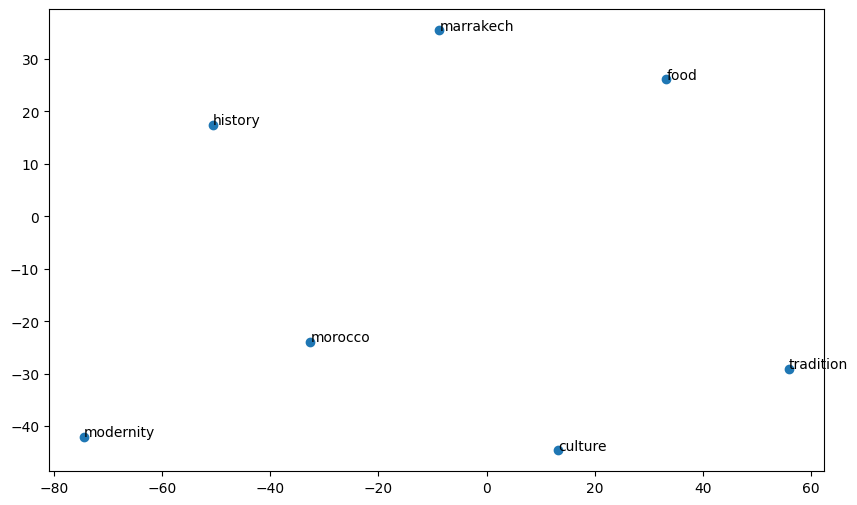

In [8]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

words_to_visualize = ["morocco", "marrakech", "tradition", "modernity", "history", "culture", "food"]

# Convert word_vectors from a list to a NumPy array
word_vectors = np.array([model.wv[word] for word in words_to_visualize])

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
word_vectors_2D = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2D[:, 0], word_vectors_2D[:, 1])

for i, word in enumerate(words_to_visualize):
    plt.annotate(word, (word_vectors_2D[i, 0], word_vectors_2D[i, 1]))

plt.show()


In [10]:
import numpy as np

words_to_visualize = ["morocco", "marrakech", "tradition", "modernity", "history", "culture", "food"]

# Convert word_vectors from a list to a NumPy array
word_vectors = np.array([model.wv[word] for word in words_to_visualize])

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
word_vectors_2D = tsne.fit_transform(word_vectors)

# Print the t-SNE-transformed vectors for each word
for word, vector in zip(words_to_visualize, word_vectors_2D):
    print(f"{word}: {vector}")


morocco: [-32.57356  -23.893831]
marrakech: [-8.727839 35.472748]
tradition: [ 55.885513 -29.032328]
modernity: [-74.404884 -41.974995]
history: [-50.599995  17.49793 ]
culture: [ 13.223935 -44.583965]
food: [33.21611 26.17493]
